In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)
x = np.linspace(0,10,200)
y = np.sin(2*x) + 0.3 * np.random.randn(200)

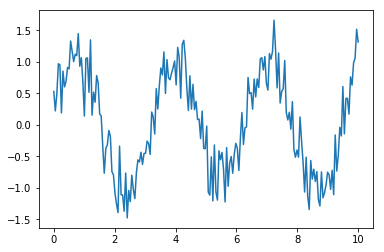

In [3]:
plt.plot(x,y)

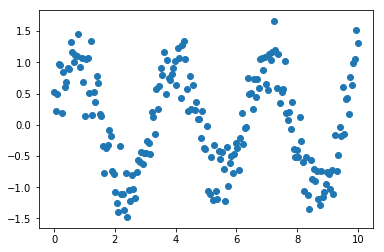

In [4]:
plt.scatter(x,y)

In [5]:
x_train = (x - np.min(x)) / (np.max(x)-np.min(x))
y_train = (y - np.min(y)) / (np.max(y)-np.min(y))

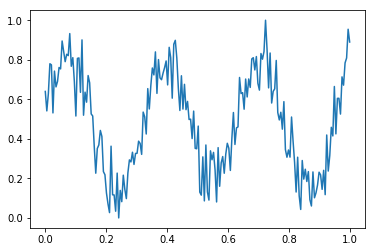

In [6]:
plt.plot(x_train, y_train)
plt.show()

In [7]:
x_train.shape

(200,)

In [8]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [9]:
model = Sequential()

In [10]:
model.add(Dense(64, input_dim=1, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

In [11]:
from keras import optimizers

In [12]:
#opt = optimizers.adam(lr=0.1, decay=0.1)
opt = optimizers.SGD(lr=0.01, momentum=0.99)

In [13]:
model.compile(loss='mse',
             optimizer=opt,
             metrics=['mean_squared_error'])

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 3,297
Trainable params: 3,297
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(x_train, y_train, 
          batch_size=32,
          epochs=1000,
          verbose=2)

Epoch 1/1000
 - 6s - loss: 0.2320 - mean_squared_error: 0.2320
Epoch 2/1000
 - 0s - loss: 0.1082 - mean_squared_error: 0.1082
Epoch 3/1000
 - 0s - loss: 0.1626 - mean_squared_error: 0.1626
Epoch 4/1000
 - 0s - loss: 0.0882 - mean_squared_error: 0.0882
Epoch 5/1000
 - 0s - loss: 0.1282 - mean_squared_error: 0.1282
Epoch 6/1000
 - 0s - loss: 0.0765 - mean_squared_error: 0.0765
Epoch 7/1000
 - 0s - loss: 0.1297 - mean_squared_error: 0.1297
Epoch 8/1000
 - 0s - loss: 0.0812 - mean_squared_error: 0.0812
Epoch 9/1000
 - 0s - loss: 0.1003 - mean_squared_error: 0.1003
Epoch 10/1000
 - 0s - loss: 0.0857 - mean_squared_error: 0.0857
Epoch 11/1000
 - 0s - loss: 0.0853 - mean_squared_error: 0.0853
Epoch 12/1000
 - 0s - loss: 0.1054 - mean_squared_error: 0.1054
Epoch 13/1000
 - 0s - loss: 0.0680 - mean_squared_error: 0.0680
Epoch 14/1000
 - 0s - loss: 0.1006 - mean_squared_error: 0.1006
Epoch 15/1000
 - 0s - loss: 0.0994 - mean_squared_error: 0.0994
Epoch 16/1000
 - 0s - loss: 0.0668 - mean_squared

In [16]:
y_pred = model.predict(x_train, batch_size=32)
y_pred = y_pred * (np.max(y)-np.min(y)) + np.min(y)

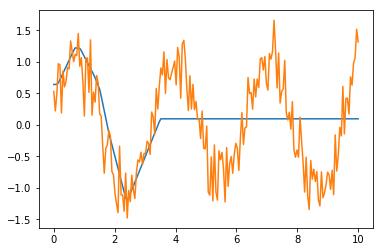

In [17]:
plt.plot(x, y_pred)
plt.plot(x, y)
plt.show()